# Investigate Titanic Passengers Dataset

## Objectives

The main question this project tries to answer is the following:
* What factors made people more likely to survive?

In order to get some insights about one of the most famous disasters in Modern History, I first identify and show the distribution of some of the passengers' characteristics (such as sex or age) in order to get a better understanding of who were the people involved. Then I put these characteristics in relation with the survival to check if any can be considered as a survival factor.  

### Data origin

The data is provided by [**Kaggle**](https://www.kaggle.com) in the form of a CSV file wich contains data of 891 Titanic passengers.
The file can be found [here](https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv).

## Wrangling phase

First of all, I import the Python libraries I am goin to use throughout the project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data acquisition
Next I load the CSV file containing Titanic passegers data into a DataFrame 

In [2]:
csv_data = pd.read_csv('titanic-data.csv')

### Checking the import

I print the very first rows to check the import went fine and to start reasoning about which columns are relevant to my analysis.  

In [3]:
csv_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning

In this step I take the CSV data and transform in a format that is more convenient for the exploration process.

The transformation process includes:
- removing those columns are not useful for my analysis,
- changing the datatype of those colum I'd like to be represented in a different way,
- identifying possible null values between the ones needed.

In order to appear as clear as possible I am going to analyze each column giving reasons for any removal or transformation process. Any information about the columns can be found at this [**Kaggle** page](https://www.kaggle.com/c/titanic/data).   

#### PassengerId
This is just a sequence number which identify the passenger. If I need to get a specific row in the DataFrame I can use the default index, so I will remove this column from the data. 
#### Survived
This is the most important information for my analysis, and to me it seems better to convert it to a boolean. 
#### Pclass
This is the passenger's ticket class and could be an interesting factor to be compared to the survival. I will keep it.
#### Name
Despite the historical importance of giving a name to each passeger, this is a descriptive information which can be removed for the rest of the analysis.
#### Sex
This is another great piece of information that can be explored. I will keep it.
#### Age
This is another precious characteristics that I will keep.
#### SibSp
This is the number of siblings or spouses aboard the Titanic. I think this type of information could be considered since it would be nice to check if families or single individuals were more likely to survive. I will keep it.
#### Parch
This is the number of parents or children aboard the Titanic. I will keep it for the same reasons explained for the previous column.
#### Ticket
This is the ticket number. I am going to remove this column since I don't find that useful for my analysis.
#### Fare
This is the fare paid for the ticket. I will keep this type of information but this would be the less interesting. The reasons is that the ticket class (that determines the quality and level of service) seems to me a better factor to be inspected rather than the price paid for getting aboard.
#### Cabin
This is the cabin number. I am going to remove this column since I don't find that useful for my analysis.
#### Embarked
This is the port of embarkation (Cherbourg, Queenstown or Southampton). I am going to remove this column since I don't find that useful for my analysis.

### Constructing the input data

I create a new, more concise DataFrame to proceed with the analysis: 

In [4]:
input_data = pd.DataFrame(csv_data[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']])
input_data['Survived'] = input_data['Survived'].astype('bool')
input_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,False,3,male,22.0,1,0,7.2500
1,True,1,female,38.0,1,0,71.2833
2,True,3,female,26.0,0,0,7.9250
3,True,1,female,35.0,1,0,53.1000
4,False,3,male,35.0,0,0,8.0500


### Checking for null values

The last step in the data cleaning phase is to make sure that there are no null values in the input data: 

In [5]:
for column in list(input_data):
    print 'Number of null entries for column {}: {}'.format(column, input_data[column].isnull().sum())

Number of null entries for column Survived: 0
Number of null entries for column Pclass: 0
Number of null entries for column Sex: 0
Number of null entries for column Age: 177
Number of null entries for column SibSp: 0
Number of null entries for column Parch: 0
Number of null entries for column Fare: 0


Unfortunately age is not always available! I am creating a second variable ```age_input_data``` to store only non-null passengers data that I can use in age-related analysis.

In [6]:
age_input_data = input_data.dropna(axis=0, how='any')

## Exploring Phase

Now I am ready to start exploring the data. First of all, I explore visually each property in order to get a better sense of the data. 

### Choosing a proper plot for each property

My strategy here is to use a pie chart for representing the percentage of the occurrences of each value for properties with a low number of possible values (less than 10), while using a more traditional histogram for continuous-like values.

In [16]:
for column in list(input_data):
    print 'Number of column {} values: {}'.format(column, len(input_data.groupby(column)))

Number of column Survived values: 2
Number of column Pclass values: 3
Number of column Sex values: 2
Number of column Age values: 88
Number of column SibSp values: 7
Number of column Parch values: 7
Number of column Fare values: 248


A lot of the passengers' data can be easily described by a pie chart since there are few groups.
For Age and Fare columns I will use a histogram instead.

### Pie chart utility function

I wrote a simple function that uses pandas and matplotlib to display a pie chart. 

In [63]:
%matplotlib inline

'''
Displays a pie chart of the distribution of the number of results by each column value
data: input DataFrame
column: the column to be inspected
title: the pie chart title
'''
def show_pie(data, column, title):
    column_count = data.groupby(column)[column].count()
    column_count.plot(kind='pie', autopct='%.2f%%')
    plt.axis('equal')
    plt.title(title)

### Survival rate

More than 61% of passengers did not survived, as shown in the following pie chart:

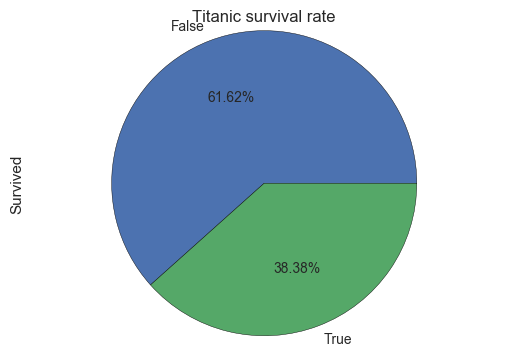

In [64]:
show_pie(input_data, 'Survived', 'Titanic survival rate')

### Ticket class distribution

More than half of passengers had the lowest class ticket service. 

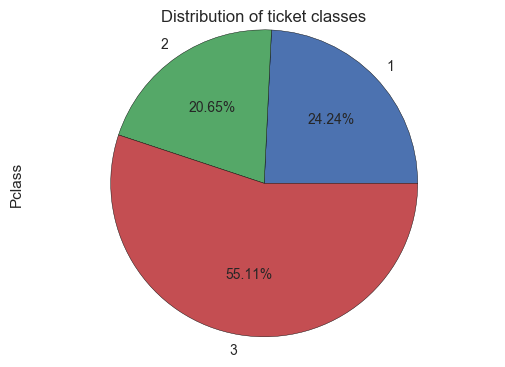

In [65]:
show_pie(input_data, 'Pclass', 'Distribution of ticket classes')

### Male vs Female

Another interesting fact is that about 2 passengers out of 3 were males.

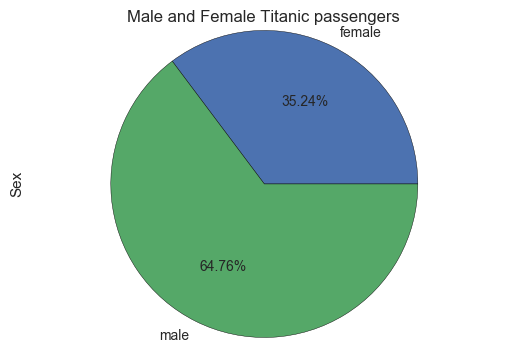

In [66]:
show_pie(input_data, 'Sex', 'Male and Female Titanic passengers')

### Passengers alone vs with family

The majority of passengers traveled alone. The maximum number registered was 8 for siblings/spouses and 6 for parents/children.

By comparing the two charts below I can say it was slightly more frequent to have families composed by spouses or siblings rather than by parents and children. Nevertheless, **Kaggle** states that some children travelled only with a nanny and this is not counted a parental relationship. Generally speaking, the majority of passengers are reported to travel without family aboard (about 2 out of 3 without siblings or spouses and about 3 out of 4 without parents or children).

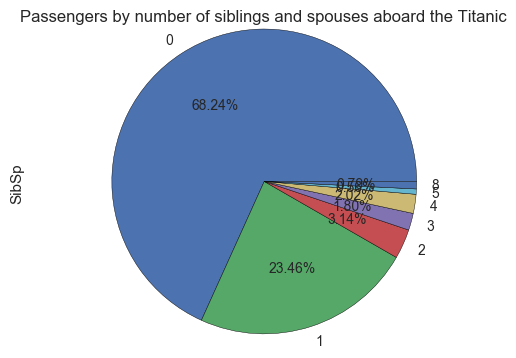

In [67]:
show_pie(input_data, 'SibSp', 'Passengers by number of siblings and spouses aboard the Titanic')

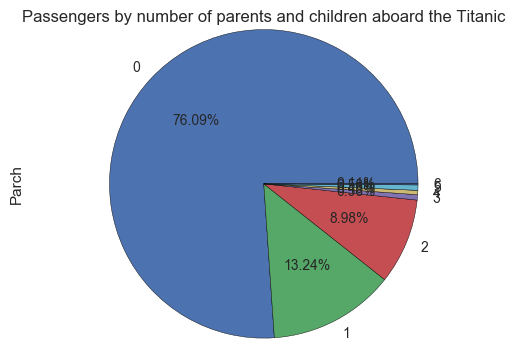

In [68]:
show_pie(input_data, 'Parch', 'Passengers by number of parents and children aboard the Titanic')

### Age and fare distribution

For inspecting the age and the fare distribution I wrote another utility function that displays some descriptive statistics and plots a histogram. 


In [54]:
'''
Displays a histogram of the column and display its descriptive statistics
data: input DataFrame
column: the column to be inspected
title: the pie chart title
'''
def show_stats_hist(data, column, title):
    column_series = data[column]
    print column_series.describe()
    column_series.hist()
    plt.title(title)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


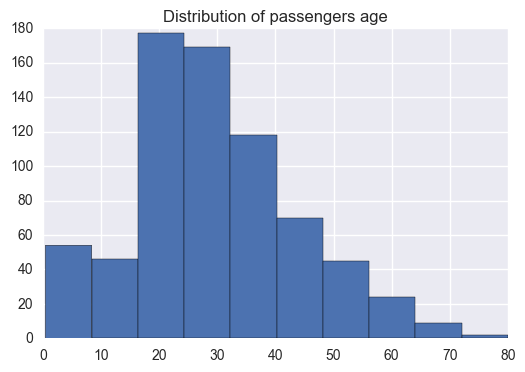

In [58]:
show_stats_hist(age_input_data, 'Age', 'Distribution of passengers age')

The majority of passengers were approximately between twenty and thirty years old.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


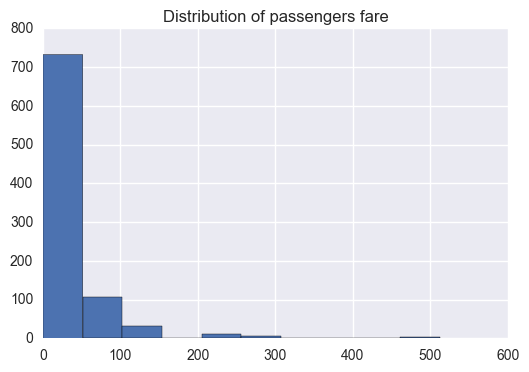

In [56]:
show_stats_hist(input_data, 'Fare', 'Distribution of passengers fare')

There are significant outliers in the rate values, but if we look at the quartiles we can say typical prices oscillate between about 8 and 31. It would be interesting to know why there were some really high fare prices despite a median fare of 14.45. 

### Looking for factors related to passengers survival

Now that I've got a snapshot of the passengers characteristics, I would like to understand if some of these made some passengers more likely to survive. Here's the process I am going to follow:
1. I separate survivors and victims data,
2. For each data column of interest (_Pclass, Sex, SibSp, Parch, Age, Fare_) I produce two different plots , one for the survivors and the other one for the victims   
2. The two plots are compared each other in order to check for differences in their shapes. 
3. Based on the previous analysis, I choose the properties I considered more significant as a survival factor. 

In [57]:
survivors_data = input_data[input_data['Survived'] == True]
victims_data = input_data[input_data['Survived'] == False]

### Survivors and victims by ticket class

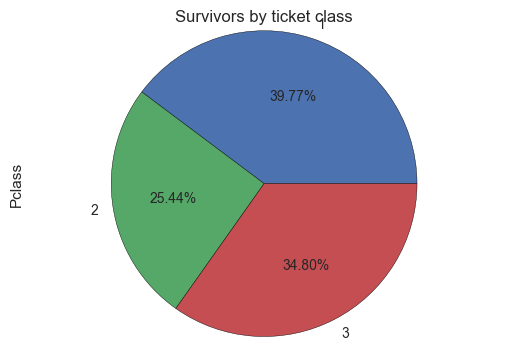

In [69]:
show_pie(survivors_data, 'Pclass', 'Survivors by ticket class')

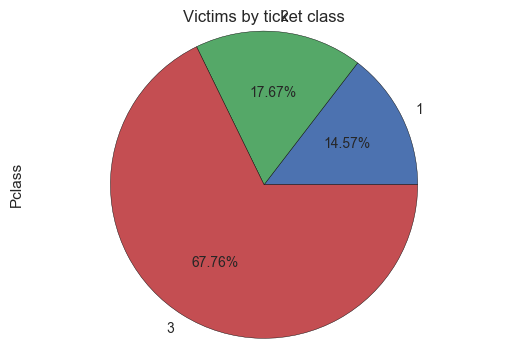

In [70]:
show_pie(victims_data, 'Pclass', 'Victims by ticket class')

This are two really interesting plots: just by looking at these I can say that:

- The majority of survivors had a first class ticket
- Approximately 2 victims out of 3 had a third class ticket

This seems to confirm that higher ticket class is also correlated to the likelihood of survival!

### Survivors and victims by sex

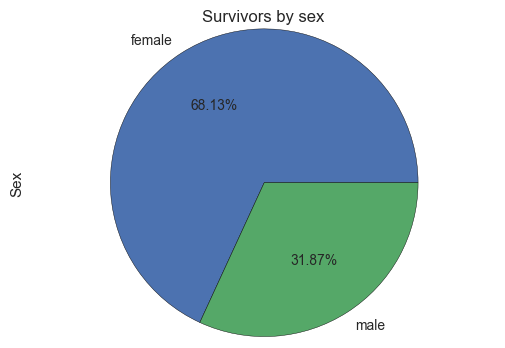

In [71]:
show_pie(survivors_data, 'Sex', 'Survivors by sex')

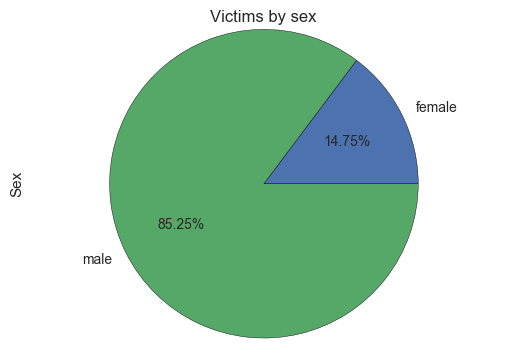

In [72]:
show_pie(victims_data, 'Sex', 'Victims by sex')

There is a remarkable difference here. Less than 15% of victims were female and less than a third of survivors were male.
I suppose that during the incident there was a priority for saving women before men.

### Survivors and victims by number of siblings or spouse aboard

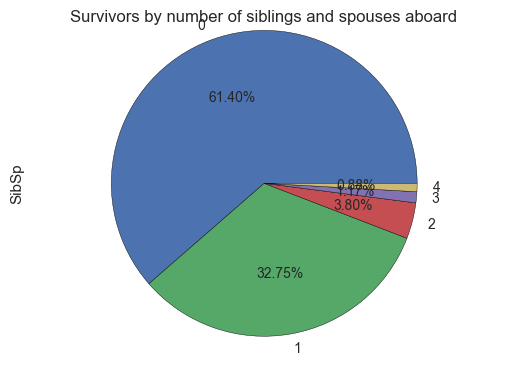

In [75]:
show_pie(survivors_data, 'SibSp', 'Survivors by number of siblings and spouses aboard')

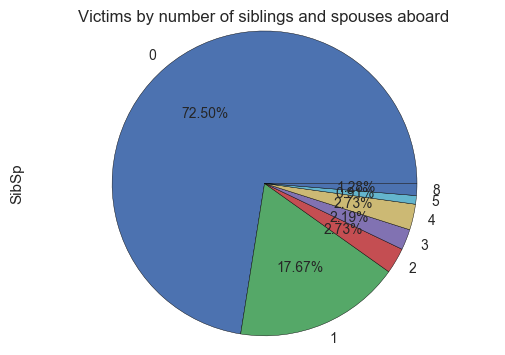

In [76]:
show_pie(victims_data, 'SibSp', 'Victims by number of siblings and spouses aboard')

I don't think there is a significant difference in the plot shapes as in the previous cases, anyway there is a slight pattern:
- passengers with 1 or 2 siblings/spouses aboard are represented with higher percentages in survivors data
- passengers without or with more than 3 sibling/spouses aboard are represented with higher percentages in victims data 



### Survivors and victims by number of parents or children aboard

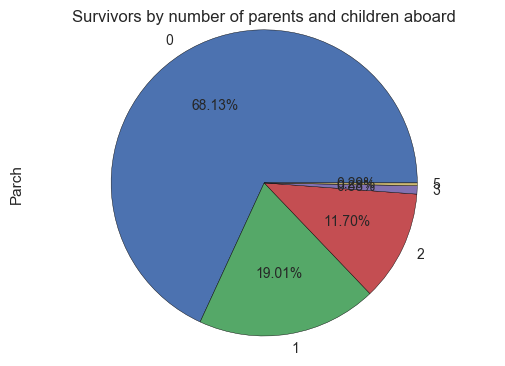

In [77]:
show_pie(survivors_data, 'Parch', 'Survivors by number of parents and children aboard')

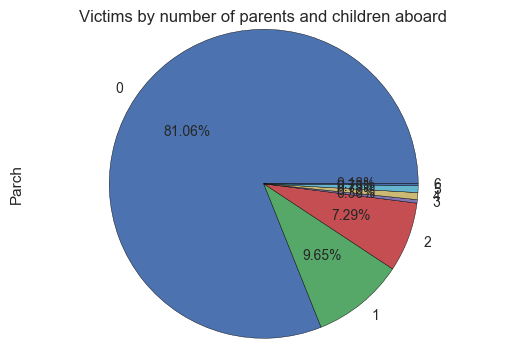

In [78]:
show_pie(victims_data, 'Parch', 'Victims by number of parents and children aboard')

There is a similar trend also with the number of parents or children aboard. 
The plot differences are not significant, but there are higher percentages of passengers with 1 or 2 parents/children aboard between survivors compared to victims.

It is possible that small family groups more likely survived rather than single individuals or large groups, but I cannot draw strong conclusions about that.

### Survivors and victims by age

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


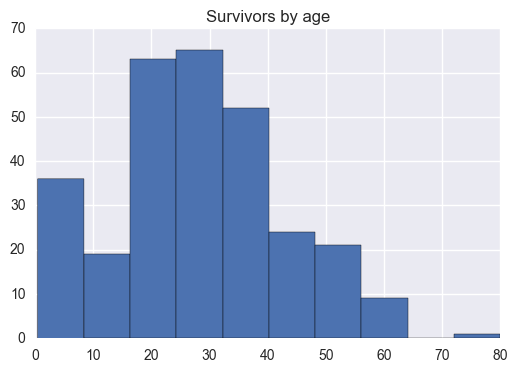

In [107]:
show_stats_hist(survivors_data, 'Age', 'Survivors by age')

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


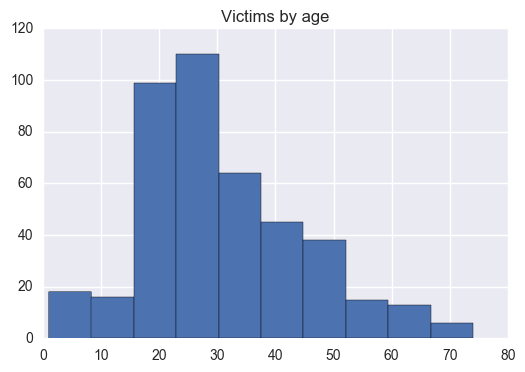

In [108]:
show_stats_hist(victims_data, 'Age', 'Victims by age')

The two shapes are very close, but the first bin caught my attention. I am taking a closer look just at the statistics of children under nine years old:  

In [102]:
print survivors_data[survivors_data['Age']< 9]['Age'].describe()

count    36.000000
mean      3.171389
std       2.170563
min       0.420000
25%       1.000000
50%       3.000000
75%       4.250000
max       8.000000
Name: Age, dtype: float64


In [104]:
print victims_data[victims_data['Age']< 9]['Age'].describe()

count    18.000000
mean      3.722222
std       2.420636
min       1.000000
25%       2.000000
50%       2.500000
75%       5.500000
max       8.000000
Name: Age, dtype: float64


Every 3 children 2 survived and 1 died. This is not so distant from the overall passengers survival rate, so we cannot infer strong conclusions about the age.

### Survivors and victims by fare

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


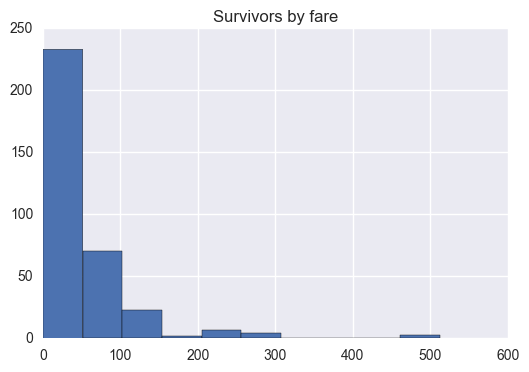

In [111]:
show_stats_hist(survivors_data, 'Fare', 'Survivors by fare')

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


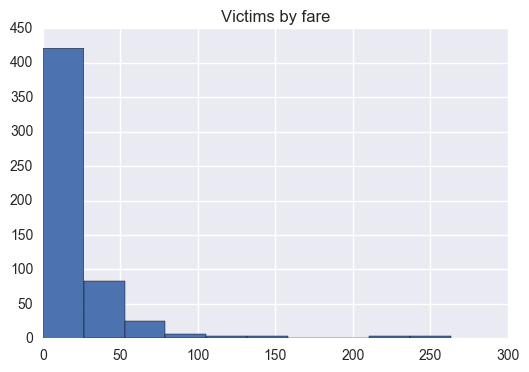

In [112]:
show_stats_hist(victims_data, 'Fare', 'Victims by fare')

The most interesting difference is the quartile values, which are lower in the victims data.
I've already found out that there is a correlation between survival and ticket class, and I based on intuition I would say that first class ticket should cost more. I am going to check it using a scatterplot:

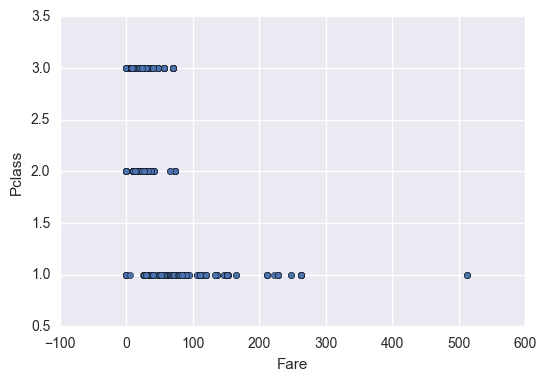

In [119]:
input_data.plot(x='Fare',y='Pclass',kind='scatter')

The highest fares were paid for first class tickets, as I expected.
That's why survivors tend to have higher values. 

### Segmenting survivors and victims by ticket class and age and ranking

From the previous analysis I think _Sex_ and _Pclass_ as the most influent factors for passengers survival.

As a last exploration exercise, I would like to segment survivors and victims by both these properties and ranking the most common groups between people who made it and people who did not.

In [137]:
def plot_class_and_sex_barh(data):
        column_count = data.groupby(['Pclass','Sex']).count()
        column_count = column_count.sort_values(by='Survived')
        column_count['Survived'].plot(kind='barh')

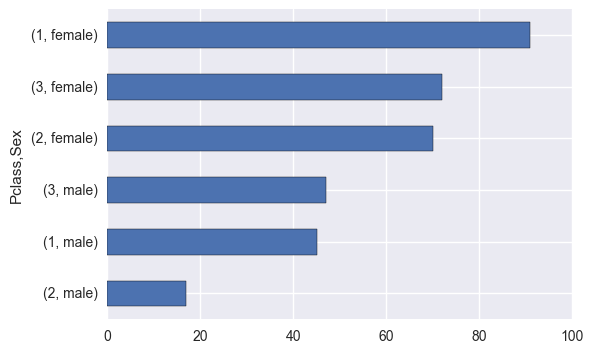

In [138]:
plot_class_and_sex_barh(survivors_data)

Between survivors, sex was the most important factor. female survivor were more than male regardless of ticket class.
The major number of survivors were female and with a first class ticket.
Between male passengers there is no much difference between the three ticket classes.

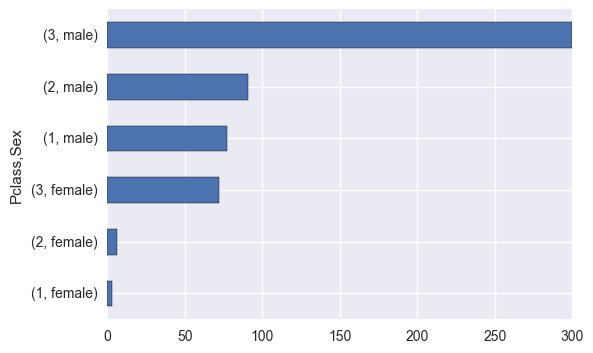

In [139]:
plot_class_and_sex_barh(victims_data)

This plot shows a clear pattern: most victims were male and with a third class ticket. 
Overall, more men died than women and, given the same sex, the more expensive ticket class lead to better chances of survival.

## Conclusions

I analyzed the Titanic dataset in order to find possible factors that made some people more likely to survived. 

Here's a recap of what I discovered:
1. About 1 person out of 3 died during the Titanic incident
2. Some characteristics have a different distribution between those who survived and those who didn't
3. The single most influential factor was sex: most victims were male
4. A second important factor was the ticket class: the higher the level of service bought, the higher the chance to survive

### Limitations

The approach prioritizes visual intuition (given by plots) over rigorous statistical methods. No hypothesis is tested in this analysis. A further development of this work could include a quantitive analysis in terms of inferential statistics.